# What Star Wars film is considered best?

This project looks at a survey with 835 responses to identify beliefs and feelings about past Star Wars films.

In [1]:
import pandas as pd
import numpy as np

## Import Data

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
print(star_wars.head(10))
print(star_wars.columns)
print(star_wars.dtypes)
#make copy
star_wars_c = star_wars.copy()

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             
5    3292719380                                                Yes             
6    3292684787                                                Yes             
7    3292663732                                                Yes             
8    3292654043                                                Yes             
9    3292640424                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

Several columns are unnamed but used to reference which movies were seen including movie name or Nan. Each movie is put in order of favorite and compared to films from the Star Trek franchise.

### Change questions to boolean values

In [3]:
#rename columns
questions = {'Have you seen any of the 6 films in the Star Wars franchise?':'have_seen',
            'Do you consider yourself to be a fan of the Star Wars film franchise?':'are_fan'}
star_wars = star_wars.rename(columns=questions)

In [4]:
# Check values for both questions
print(star_wars['have_seen'].value_counts(dropna=False))
print(star_wars['are_fan'].value_counts(dropna=False))

Yes    936
No     250
Name: have_seen, dtype: int64
Yes    552
NaN    350
No     284
Name: are_fan, dtype: int64


In [5]:
#Convert the Have you seen any of the 6 films in the 
# Star Wars franchise? column to the Boolean type

make_bool = {'Yes': True,
            'No': False}
star_wars['have_seen'] = star_wars['have_seen'].map(make_bool)
star_wars['are_fan'] = star_wars['are_fan'].map(make_bool)
print(star_wars.head(10))

   RespondentID  have_seen are_fan  \
0    3292879998       True    True   
1    3292879538      False     NaN   
2    3292765271       True   False   
3    3292763116       True    True   
4    3292731220       True    True   
5    3292719380       True    True   
6    3292684787       True    True   
7    3292663732       True    True   
8    3292654043       True    True   
9    3292640424       True   False   

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1                                                NaN                                    
2           Star Wars: Episode I  The Phantom Menace                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom M

## Clean Episodes Seen

In [6]:
#Name columns
cols = {"Which of the following Star Wars films have you seen? Please select all that apply.":'seen_1',
        'Unnamed: 4':'seen_2',
        'Unnamed: 5':'seen_3',
        'Unnamed: 6':'seen_4',
        'Unnamed: 7':'seen_5',
        'Unnamed: 8':'seen_6'}
star_wars = star_wars.rename(columns = cols)
for col in star_wars.columns[3:9]:
    print(star_wars[col].value_counts(dropna=False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_5, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen_6, dtype: int64


In [7]:
#Change episodes to seen or not, Nans defined as not seen (False)
seen_bool_map = {"Star Wars: Episode I  The Phantom Menace": True,
                 "Star Wars: Episode II  Attack of the Clones": True,
                 "Star Wars: Episode III  Revenge of the Sith": True,
                 "Star Wars: Episode IV  A New Hope": True,
                 "Star Wars: Episode V The Empire Strikes Back": True,
                 "Star Wars: Episode VI Return of the Jedi": True}
seen_bool_map[np.nan]=False
for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(seen_bool_map)
    print(star_wars[col].value_counts(dropna=False))


True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64
True     738
False    448
Name: seen_6, dtype: int64


## Clean Episode Ratings

In [8]:
#Convert each preference of film to float
star_wars[star_wars.columns[9:15]] = star_wars[
    star_wars.columns[9:15]].astype('float')

In [9]:
#Name columns
cols = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":'ranking_1',
        'Unnamed: 10':'ranking_2',
        'Unnamed: 11':'ranking_3',
        'Unnamed: 12':'ranking_4',
        'Unnamed: 13':'ranking_5',
        'Unnamed: 14':'ranking_6'}
star_wars = star_wars.rename(columns = cols)

In [10]:
# Average each Ranking
rankings_means = star_wars[star_wars.columns[9:15]].mean()
print(rankings_means)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


## Plot bar chart of seen episodes

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x7fbbf40f5cd0>,
 [Text(0, 0, 'Episode 1'),
  Text(0, 0, 'Episode 2'),
  Text(0, 0, 'Episode 3'),
  Text(0, 0, 'Episode 4'),
  Text(0, 0, 'Episode 5'),
  Text(0, 0, 'Episode 6')])

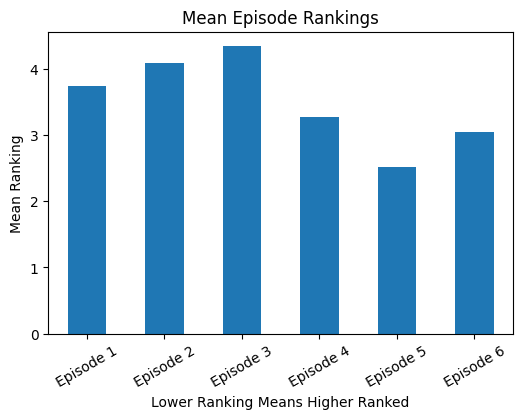

In [12]:
#create labels
episodes = []
for i in range(6) :
    episodes.append("Episode " + str(i+1))
xlabels = episodes

rankings_means.plot.bar()
plt.title('Mean Episode Rankings')
plt.xlabel('Lower Ranking Means Higher Ranked')
plt.ylabel('Mean Ranking')
plt.xticks(ticks = range(len(rankings_means)),labels=xlabels, rotation = 30)

Lower ranking means best and Emprie Strikes Back (ranking_5) is rated the highest movie followed by episode 6 and episode 4. Episode 3 is the least liked movie.

## Plotting Movies Seen

([<matplotlib.axis.XTick at 0x7fbbf54740a0>,
 [Text(0, 0, 'Episode 1'),
  Text(0, 0, 'Episode 2'),
  Text(0, 0, 'Episode 3'),
  Text(0, 0, 'Episode 4'),
  Text(0, 0, 'Episode 5'),
  Text(0, 0, 'Episode 6')])

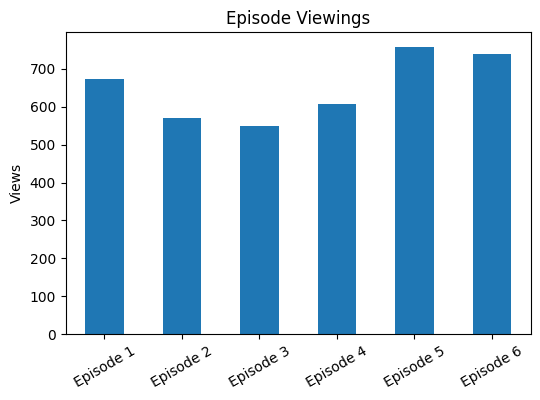

In [13]:
episodes_seen = star_wars[star_wars.columns[3:9]].sum()

episodes_seen.plot.bar()
plt.title('Episode Viewings')
plt.ylabel('Views')
plt.xticks(ticks = range(len(episodes_seen)),labels=xlabels, rotation = 30)

Episode 5 was seen the most followed by Episode 6. Episode 3 and Episode 2 were viewed the fewest times. Views seem to correlate well with rating as higher rated movies were watched more and lower rated movies were watched less.

## Star Wars Patterns with Gender

In [14]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

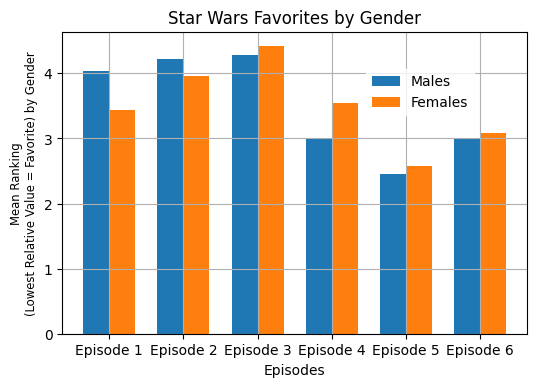

In [35]:
#Rating by gender
# Average each Ranking
male_rank = males[males.columns[9:15]].mean()
female_rank = females[females.columns[9:15]].mean()


fig, ax1 = plt.subplots()

x = np.arange(len(xlabels))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax1.bar(x - width/2, male_rank, width, label='Males')
rects2 = ax1.bar(x + width/2, female_rank, width, label='Females')

ax1.set_title("Star Wars Favorites by Gender")
ax1.set_ylabel("Mean Ranking\n(Lowest Relative Value = Favorite) by Gender", fontsize='small')
ax1.set_xlabel("Episodes")
ax1.set_xticks(x)
ax1.set_xticklabels(xlabels)
ax1.set_facecolor('white')
ax1.grid(None)
ax1.legend(loc='center right', bbox_to_anchor=(0.9, 0.8), edgecolor='white', facecolor='white')

plt.show()

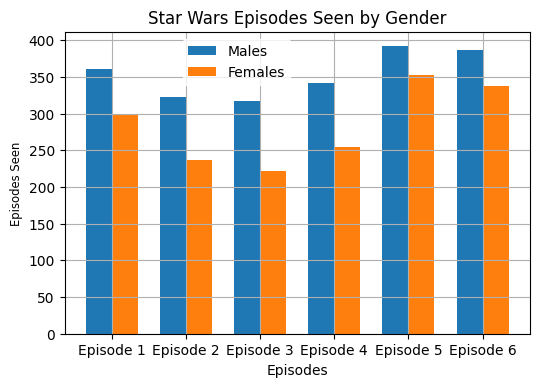

In [36]:
#Seen by gender
male_seen = males[males.columns[3:9]].sum()
female_seen = females[females.columns[3:9]].sum()


fig, ax1 = plt.subplots()

x = np.arange(len(xlabels))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax1.bar(x - width/2, male_seen, width, label='Males')
rects2 = ax1.bar(x + width/2, female_seen, width, label='Females')

ax1.set_title("Star Wars Episodes Seen by Gender")
ax1.set_ylabel("Episodes Seen", fontsize='small')
ax1.set_xlabel("Episodes")
ax1.set_xticks(x)
ax1.set_xticklabels(xlabels)
ax1.set_facecolor('white')
ax1.grid(None)
ax1.legend(loc='center right', bbox_to_anchor=(0.5, 0.9), edgecolor='white', facecolor='white')

plt.show()

Males tend to watch Star Wars more 